In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# read dataset
data_path = os.path.join(os.getcwd(), "data/healthcare-dataset-stroke-data.csv")
data = pd.read_csv(data_path)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# drop rows that have NAN
data_cleaned = data.dropna(axis=0)
data_cleaned.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


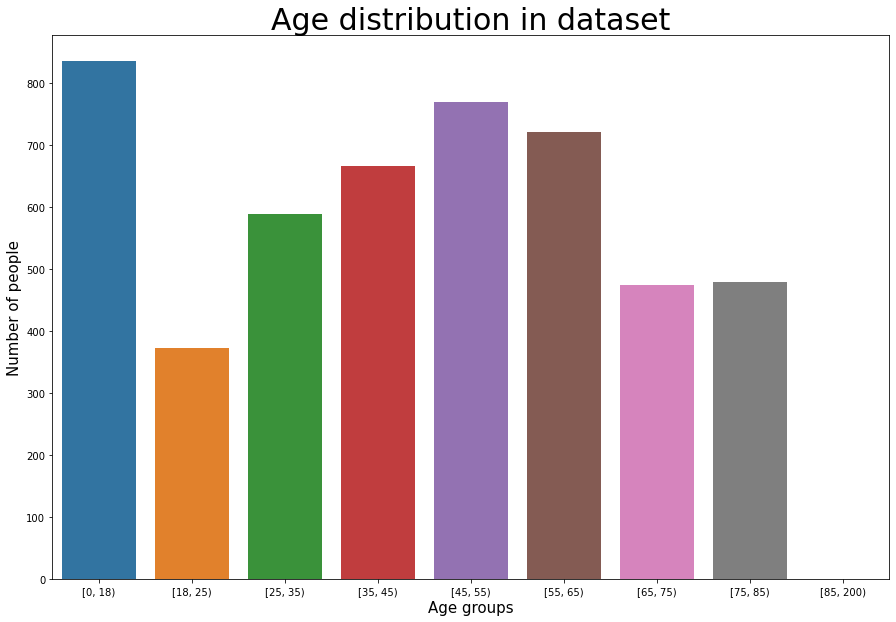

In [5]:
age_distribution = pd.cut(data_cleaned["age"], bins=[0, 18, 25, 35, 45, 55, 65, 75, 85, 200], include_lowest=True, right=False).value_counts()
plt.figure(figsize=(15,10))
plt.title("Age distribution in dataset", size=30)
sns.barplot(age_distribution.index, age_distribution.values)
plt.xlabel("Age groups", size=15)
plt.ylabel("Number of people", size=15)
plt.show()

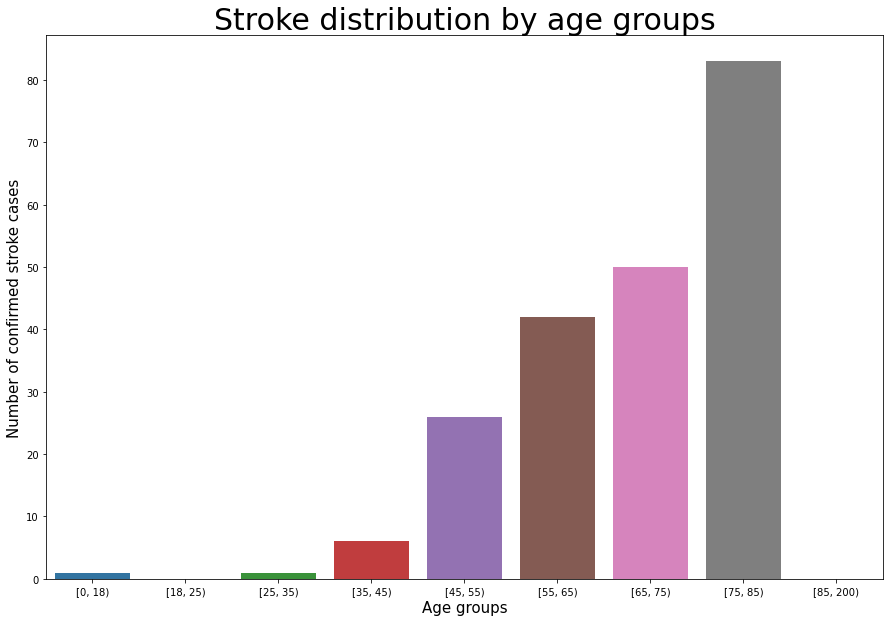

In [6]:
stroked = data_cleaned[data_cleaned["stroke"] == 1]
age_distribution = pd.cut(stroked["age"], bins=[0, 18, 25, 35, 45, 55, 65, 75, 85, 200], include_lowest=True, right=False).value_counts()
plt.figure(figsize=(15,10))
plt.title("Stroke distribution by age groups", size=30)
sns.barplot(age_distribution.index, age_distribution.values)
plt.xlabel("Age groups", size=15)
plt.ylabel("Number of confirmed stroke cases", size=15)
plt.show()

In [7]:
married_count = data_cleaned.groupby("ever_married").size()
heart_disease = data_cleaned[data_cleaned["heart_disease"] == 1]
hyperstension = data_cleaned[data_cleaned["hypertension"] == 1]
heart_and_hyperstension = hyperstension[hyperstension["heart_disease"] == 1]

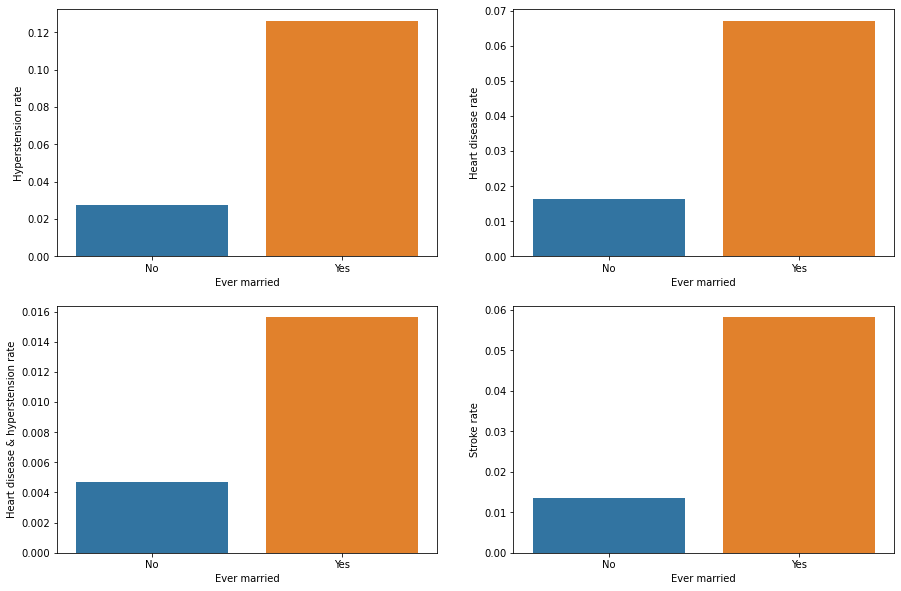

In [8]:
temp = hyperstension.groupby(["ever_married"]).size()

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.barplot(married_count.index, temp / married_count.values)
plt.ylabel("Hyperstension rate", size=10)
plt.xlabel("Ever married", size=10)

temp = heart_disease.groupby(["ever_married"]).size()
plt.subplot(2, 2, 2)
sns.barplot(married_count.index, temp / married_count.values)
plt.ylabel("Heart disease rate", size=10)
plt.xlabel("Ever married", size=10)

temp = heart_and_hyperstension.groupby(["ever_married"]).size()
plt.subplot(2, 2, 3)
sns.barplot(married_count.index, temp / married_count.values)
plt.ylabel("Heart disease & hyperstension rate", size=10)
plt.xlabel("Ever married", size=10)

temp = data_cleaned[data_cleaned["stroke"] == 1].groupby("ever_married").size()
plt.subplot(2, 2, 4)
sns.barplot(married_count.index, temp / married_count.values)
plt.ylabel("Stroke rate", size=10)
plt.xlabel("Ever married", size=10)

plt.show()

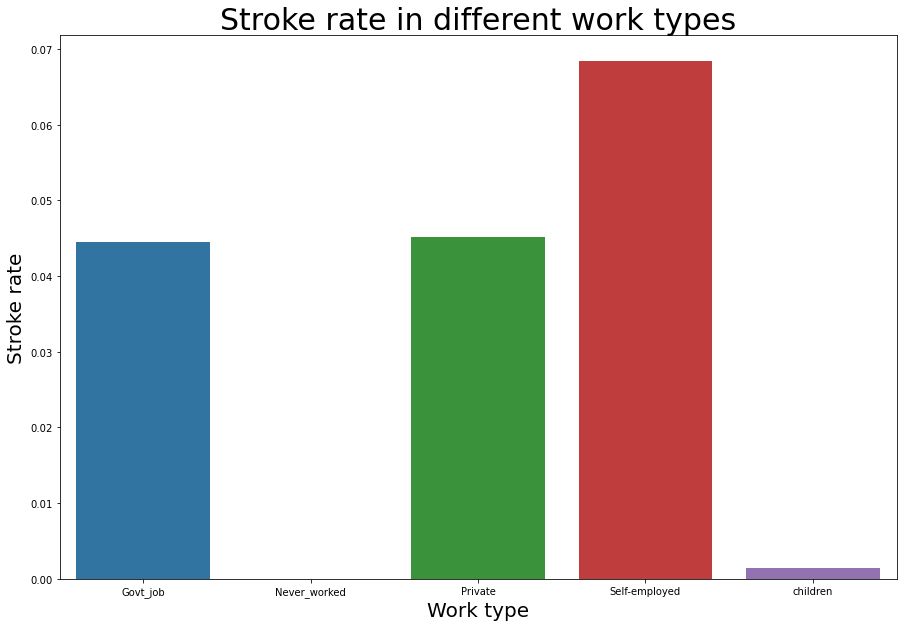

In [9]:
work_type_counts = data_cleaned.groupby("work_type").size()
work_type = data_cleaned[data_cleaned["stroke"] == 1].groupby("work_type").size()
temp = work_type / work_type_counts
temp = temp.fillna(0)

plt.figure(figsize=(15,10))
plt.title("Stroke rate in different work types", size=30)
sns.barplot(temp.index, temp.values)
plt.xlabel("Work type", size=20)
plt.ylabel("Stroke rate", size=20)
plt.show()

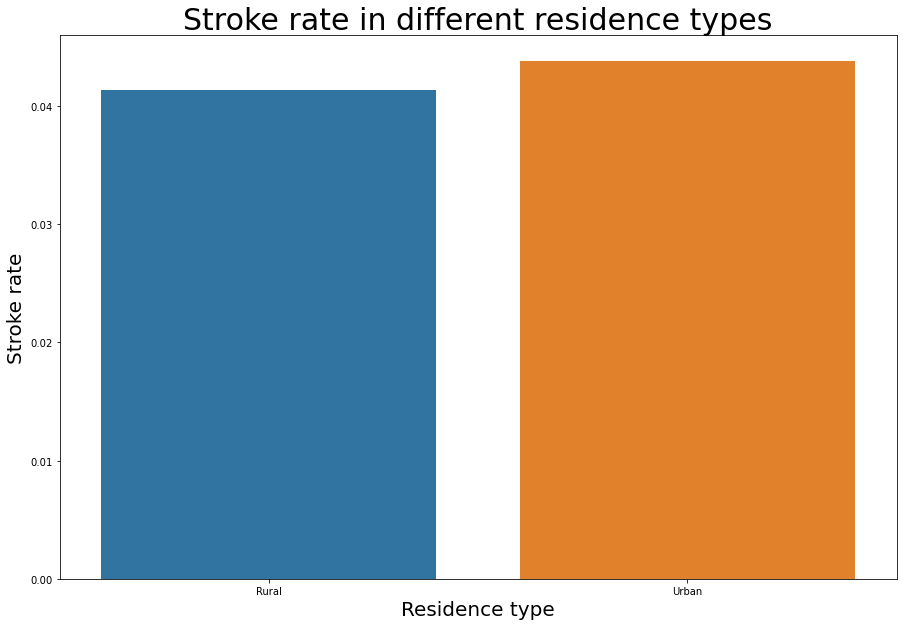

In [10]:
residence_counts = data_cleaned.groupby("Residence_type").size()
residence_stroke_rate = data_cleaned[data_cleaned["stroke"] == 1].groupby("Residence_type").size() / residence_counts
residence_stroke_rate

plt.figure(figsize=(15,10))
plt.title("Stroke rate in different residence types", size=30)
sns.barplot(residence_stroke_rate.index, residence_stroke_rate.values)
plt.xlabel("Residence type", size=20)
plt.ylabel("Stroke rate", size=20)
plt.show()

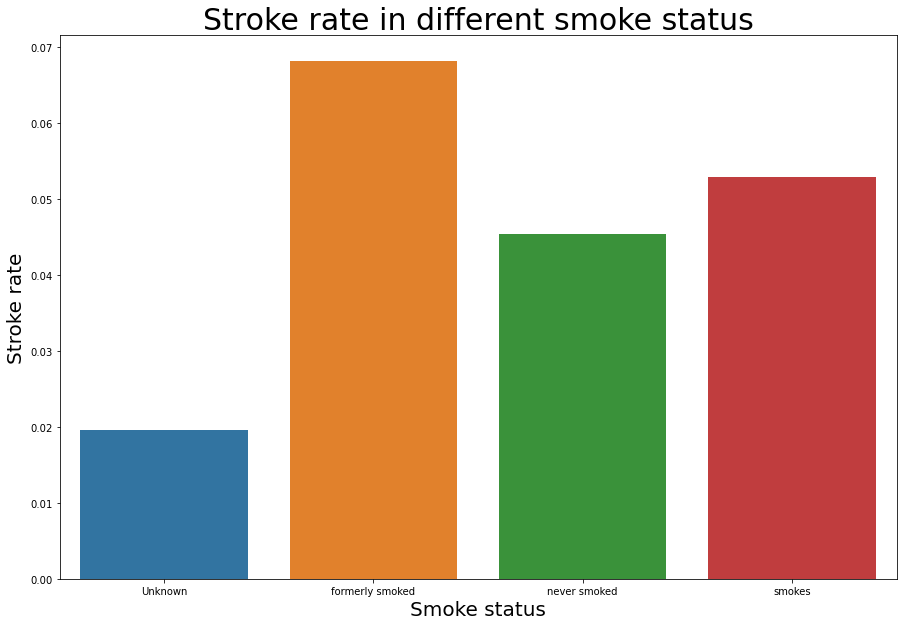

In [11]:
data_cleaned["smoking_status"].unique()
smoker_counts = data_cleaned.groupby("smoking_status").size()
smoker_stroke_rate = data_cleaned[data_cleaned["stroke"] == 1].groupby("smoking_status").size() / smoker_counts
smoker_stroke_rate

plt.figure(figsize=(15,10))
plt.title("Stroke rate in different smoke status", size=30)
sns.barplot(smoker_stroke_rate.index, smoker_stroke_rate.values)
plt.xlabel("Smoke status", size=20)
plt.ylabel("Stroke rate", size=20)
plt.show()

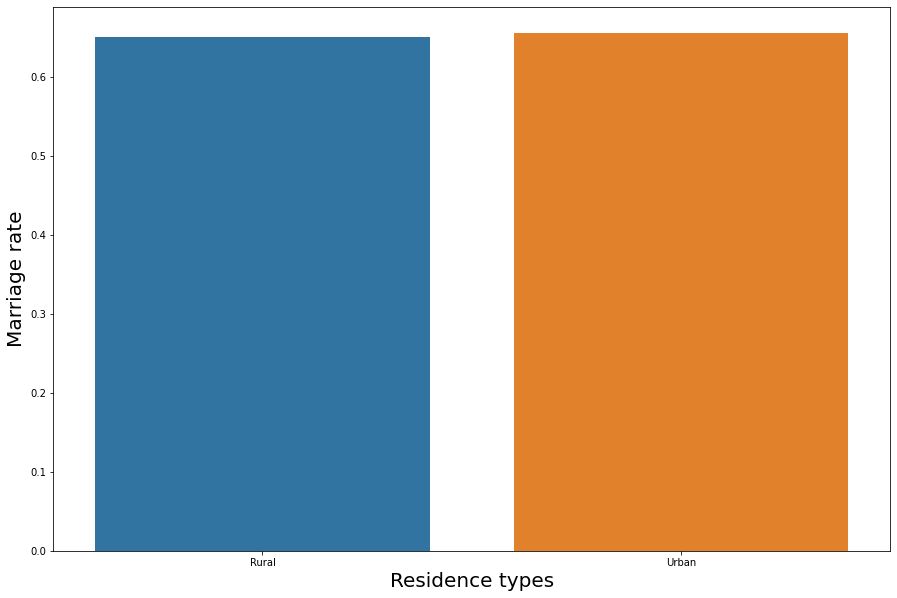

In [12]:
residence_marriage = data_cleaned.groupby(["Residence_type", "ever_married"]).size().unstack()

plt.figure(figsize=(15,10))
sns.barplot(["Rural", "Urban"], [(residence_marriage.iloc[0]["Yes"] / sum(residence_marriage.iloc[0].values)), (residence_marriage.iloc[1]["Yes"] / sum(residence_marriage.iloc[1].values))])
plt.ylabel("Marriage rate", size=20)
plt.xlabel("Residence types", size=20)
plt.show()

In [13]:
data_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


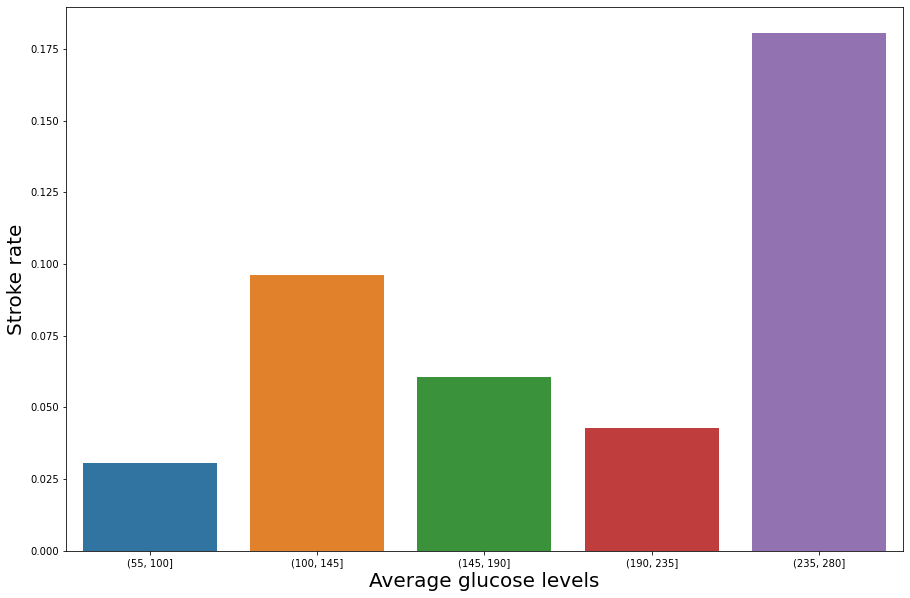

In [14]:
stroke_glu_levels = pd.cut(data_cleaned[data_cleaned["stroke"] == 1]["avg_glucose_level"], bins=[55, 100, 145, 190, 235, 280]).value_counts()
glu_levels = pd.cut(data_cleaned["avg_glucose_level"], bins=[55, 100, 145, 190, 235, 280]).value_counts()

plt.figure(figsize=(15,10))
sns.barplot(stroke_glu_levels.index, stroke_glu_levels.values / glu_levels.values)
plt.xlabel("Average glucose levels", size=20)
plt.ylabel("Stroke rate", size=20)
plt.show()

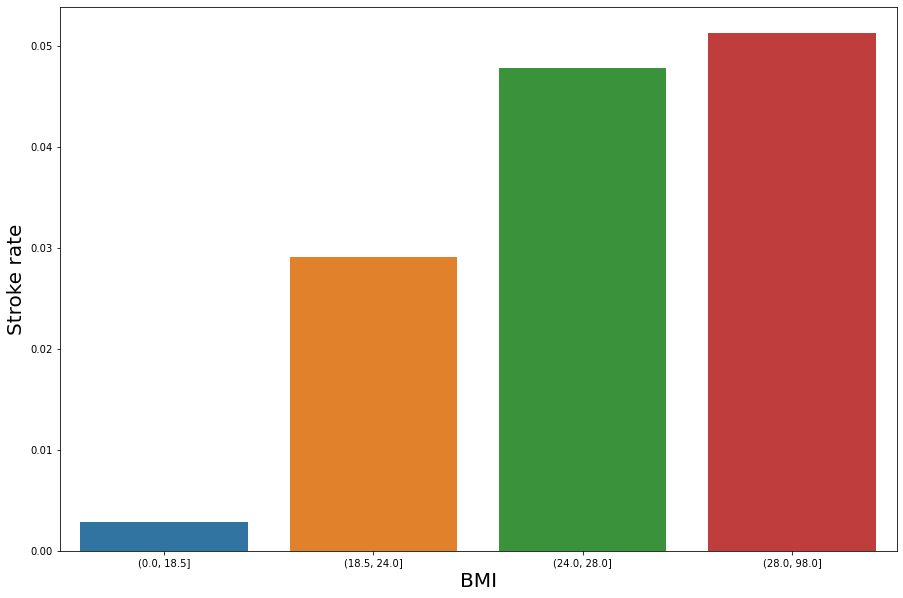

In [15]:
stroke_bmi = pd.cut(data_cleaned[data_cleaned["stroke"] == 1]["bmi"], bins=[0, 18.5, 24, 28, 98]).value_counts()
bmi = pd.cut(data_cleaned["bmi"], bins=[0, 18.5, 24, 28, 98]).value_counts()

plt.figure(figsize=(15,10))
sns.barplot(stroke_bmi.index, stroke_bmi.values / bmi.values)
plt.xlabel("BMI", size=20)
plt.ylabel("Stroke rate", size=20)
plt.show()

In [16]:
data_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [29]:
features = data_cleaned.drop(["id", "gender", "Residence_type", "stroke"], axis=1)
target = data_cleaned["stroke"]
features = pd.get_dummies(features)

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

rfc = RandomForestClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()

